In [21]:
#importing the dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


dataset = pd.read_csv("heart.csv")

In [4]:
dataset.head(10)
dataset.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [5]:
del dataset["Sex"]

x = dataset.iloc[:,0:-1].values

y = dataset.iloc[:,-1]

# print(x[: ,6])

In [6]:
#Encoding categorical data
# pd.set_option("display.max_rows",15)
# print(dataset.iloc[:,6])

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# dataset.iloc[:,1] =label_encoder.fit_transform(dataset.iloc[:,1])
x[:,7] = label_encoder.fit_transform(x[:,7])
x[5]

array([39, 'NAP', 120, 339, 0, 'Normal', 170, 0, 0.0, 'Up'], dtype=object)

In [7]:
# dataset["ExerciseAngina"]=label_encoder.fit_transform(dataset["ExerciseAngina"])
# dataset

In [8]:
#OneHotEncodeing Encoding
#pd.set_option("display.max_rows",None)
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct  =  ColumnTransformer(transformers = [("encoder", OneHotEncoder(), [1])],remainder = "passthrough" )
# ct1 = ColumnTransformer(transformers = [("encoder", OneHotEncoder(), [9])],remainder = "passthrough" )
# ct2 = ColumnTransformer(transformers = [("encoder", OneHotEncoder(), [11])],remainder = "passthrough" )
# ct3 = ColumnTransformer(transformers = [("encoder", OneHotEncoder(), [16])],remainder = "passthrough" )
#ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
x =ct.fit_transform(x)
# dataset = ct1.fit_transform(dataset)
# dataset = ct2.fit_transform(dataset)
# dataset = ct3.fit_transform(dataset)

print(x[5])
x = np.array(x)

[0.0 0.0 1.0 0.0 39 120 339 0 'Normal' 170 0 0.0 'Up']


In [9]:

ct1 = ColumnTransformer(transformers = [("encoder", OneHotEncoder(), [8])],remainder = "passthrough" )
x = ct1.fit_transform(x)


In [10]:
x = np.array(x)
x[:5]


array([[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 40, 140, 289, 0, 172, 0, 0.0,
        'Up'],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 49, 160, 180, 0, 156, 0, 1.0,
        'Flat'],
       [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 37, 130, 283, 0, 98, 0, 0.0,
        'Up'],
       [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 48, 138, 214, 0, 108, 1, 1.5,
        'Flat'],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 54, 150, 195, 0, 122, 0, 0.0,
        'Up']], dtype=object)

In [11]:
# #Declare independent and dependent variable
# pd.set_option("display.max_rows",None)
# pd.set_option("display.max_columns",None)
# dataset = pd.DataFrame(dataset)
ct2 = ColumnTransformer(transformers = [("encoder", OneHotEncoder(), [14])],remainder = "passthrough" )
x = ct2.fit_transform(x)
x = np.array(x)
x[:5]

array([[0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 40, 140, 289,
        0, 172, 0, 0.0],
       [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 49, 160, 180,
        0, 156, 0, 1.0],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 37, 130, 283,
        0, 98, 0, 0.0],
       [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 48, 138, 214,
        0, 108, 1, 1.5],
       [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 54, 150, 195,
        0, 122, 0, 0.0]], dtype=object)

In [12]:
#Splitting Data Set
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 0 )

In [13]:
#Standard SCaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train =sc.fit_transform(x_train)
x_train = np.array(x_train)
x_test =sc.fit_transform(x_test)
x_test = np.array(x_test)


In [14]:
#create Model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)
# classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)


KNeighborsClassifier()

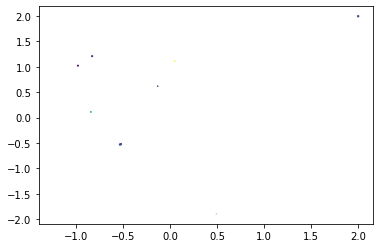

In [31]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
plt.scatter(X_set[0], X_set[1], X_set[3],X_set[4])

In [32]:
 classifier.feature_importances_

AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importances_'

In [27]:
y_pred  = classifier.predict(x_test)
y_pred

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

print(x_train[0])

[[ 73  19]
 [ 19 119]]
0.8347826086956521
[-0.27994626 -0.97700842  1.13055106 -0.49408801 -1.23294222  1.99637352
 -1.05684582  1.97845539 -0.53027522 -0.22800826  0.0485459  -0.1308378
  0.49219339 -0.52126676  0.70404043 -0.82592469 -0.83982099]
